<a href="https://colab.research.google.com/github/vitorscience/Data-Science/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito Nubank


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*.

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://s2.glbimg.com/jSjr-G312XxUPZPlUoPKYusnrpI=/620x350/e.glbimg.com/og/ed/f/original/2021/05/17/novo_logo.png" width="40%">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="https://cdnm.westwing.com.br/glossary/uploads/br/2014/06/03155002/m%C3%A3o-segurando-um-guarda-chuva-roxo-em-um-fundo-amarelo_c-a1810.jpg" width="400px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.


## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [55]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder


In [56]:
#Importando o DataFrame
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

In [57]:
#Primeiras 5 linhas do dataframe
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [58]:
#Verificando as colunas existentes
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [59]:
#Verificando o tipo de dado de cada coluna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

# **Dionário de variáveis**


1. **ids**: Identificador único para cada entrada (tipo: texto).  
2. **target_default**: Indica se houve inadimplência no pagamento (tipo: texto, possui valores ausentes).  
3. **score_1**: Pontuação de risco 1 (tipo: texto, possui valores ausentes).  
4. **score_2**: Pontuação de risco 2 (tipo: texto, possui valores ausentes).  
5. **score_3**: Pontuação de risco 3 (tipo: número decimal, possui valores ausentes).  
6. **score_4**: Pontuação de risco 4 (tipo: número decimal).  
7. **score_5**: Pontuação de risco 5 (tipo: número decimal).  
8. **score_6**: Pontuação de risco 6 (tipo: número decimal).  
9. **risk_rate**: Taxa de risco associada (tipo: número decimal, possui valores ausentes).  
10. **last_amount_borrowed**: Último valor emprestado (tipo: número decimal, possui muitos valores ausentes).  
11. **last_borrowed_in_months**: Número de meses desde o último empréstimo (tipo: número decimal, possui muitos valores ausentes).  
12. **credit_limit**: Limite de crédito do cliente (tipo: número decimal, possui valores ausentes).  
13. **reason**: Motivo para solicitação de crédito (tipo: texto, possui valores ausentes).  
14. **income**: Renda declarada do cliente (tipo: número decimal, possui valores ausentes).  
15. **facebook_profile**: Indica se o cliente possui perfil no Facebook (tipo: texto, possui valores ausentes).  
16. **state**: Estado de residência do cliente (tipo: texto, possui valores ausentes).  
17. **zip**: CEP do cliente (tipo: texto, possui valores ausentes).  
18. **channel**: Canal de aquisição do cliente (tipo: texto, possui valores ausentes).  
19. **job_name**: Nome da ocupação do cliente (tipo: texto, possui valores ausentes).  
20. **real_state**: Estado de propriedade imobiliária do cliente (tipo: texto, possui valores ausentes).  
21. **ok_since**: Ano desde quando o cliente está com situação financeira estável (tipo: número decimal, possui muitos valores ausentes).  
22. **n_bankruptcies**: Número de falências do cliente (tipo: número decimal, possui valores ausentes).  
23. **n_defaulted_loans**: Número de empréstimos inadimplentes (tipo: número decimal, possui valores ausentes).  
24. **n_accounts**: Número total de contas do cliente (tipo: número decimal, possui valores ausentes).  
25. **n_issues**: Número de problemas reportados (tipo: número decimal, possui valores ausentes).  
26. **application_time_applied**: Tempo de aplicação do cliente (tipo: texto).  
27. **application_time_in_funnel**: Tempo do cliente no funil de aplicação (tipo: número inteiro).  
28. **email**: Endereço de e-mail do cliente (tipo: texto).  
29. **external_data_provider_credit_checks_last_2_year**: Verificações de crédito nos últimos 2 anos (tipo: número decimal, possui muitos valores ausentes).  
30. **external_data_provider_credit_checks_last_month**: Verificações de crédito no último mês (tipo: número inteiro).  
31. **external_data_provider_credit_checks_last_year**: Verificações de crédito no último ano (tipo: número decimal, possui valores ausentes).  
32. **external_data_provider_email_seen_before**: Indica se o e-mail foi usado antes (tipo: número decimal, possui valores ausentes).  
33. **external_data_provider_first_name**: Primeiro nome do cliente (tipo: texto).  
34. **external_data_provider_fraud_score**: Pontuação de risco de fraude (tipo: número inteiro).  
35. **lat_lon**: Latitude e longitude do cliente (tipo: texto, possui valores ausentes).  
36. **marketing_channel**: Canal de marketing utilizado (tipo: texto, possui valores ausentes).  
37. **profile_phone_number**: Número de telefone do cliente (tipo: texto).  
38. **reported_income**: Renda reportada pelo cliente (tipo: número decimal).  
39. **shipping_state**: Estado para onde o cliente envia produtos (tipo: texto).  
40. **shipping_zip_code**: CEP para envio de produtos (tipo: número inteiro).  
41. **profile_tags**: Tags associadas ao perfil do cliente (tipo: texto).  
42. **user_agent**: Informações do navegador/dispositivo do cliente (tipo: texto, possui valores ausentes).  
43. **target_fraud**: Indica se o cliente está envolvido em fraude (tipo: texto, possui muitos valores ausentes).  



In [60]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataframe possui 45000 linhas e 43 colunas


In [61]:
df.isnull().sum()/df.shape[0]*100

,0
ids,0.000000
target_default,7.242222
score_1,1.248889
score_2,1.248889
score_3,1.248889
score_4,0.000000
score_5,0.000000
score_6,0.000000
risk_rate,1.248889
last_amount_borrowed,66.568889


É possivel verificar que o data frame contém diversas variáveis nulas, isso impacta na parte de modelagem de dados, para concertar será preciso fazer uma etapa de limpeza de dados

> Adicionar aspas



In [62]:
df.target_fraud.value_counts()

,count
target_fraud,
fraud_friends_family,904
fraud_id,618


In [63]:
#Verificando de o data frame tem ids cuplicados
df.ids.duplicated().sum()

0

É possivel verificar um desbalanceamento na variável target_default, o desbalancemanto pode afetar na previsão do modelo eviesando os dados, existem técnicas que podem ajudar fazendo um rebalanceamento dos dados.


In [64]:
df.target_default.value_counts()

,count
target_default,
False,35080
True,6661


In [65]:
#Quantidade de nulos da variável target_default
df.target_default.isnull().sum()/df.shape[0]

0.07242222222222222

In [66]:
#Verificando a quantidade de campos distintos em cada coluna
df.nunique().sort_values()

,0
external_data_provider_credit_checks_last_2_year,1
channel,1
target_fraud,2
target_default,2
external_data_provider_credit_checks_last_year,2
facebook_profile,2
last_borrowed_in_months,2
external_data_provider_credit_checks_last_month,4
n_defaulted_loans,5
real_state,5


In [67]:
#Analisando as variáveis do Dataframe
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [68]:
df.target_default

,target_default
0,False
1,False
2,True
3,False
4,False
...,...
44995,False
44996,False
44997,False
44998,True


# **Preparando os dados**
Nessa etapa sera feita o tratamento dos dados, será feito o Tratamento dos dados, algumas variáveis seram retiradas do DataFrame, 'target_fraud', 'ids','external_data_provider_credit_checks_last_2_year''reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel', Elas Apresentam quantidade excessiva de dados nulos ou não possuem efetividade dentro dentro do projeto,



*external_data_provider_email_seen_before* na variável external_data_provider_email_seen_before, tudo que estiver como -999.0 sera mudado para nan,      a variável   reported_income sera tudo que inf voltada para nan



No último tratamento todas as linhas na variável target_default que estão como nulas, serão removidas. do data frame

In [69]:
df_clean = df.copy()
#Removendo as conulas 'target_fraud', 'ids','external_data_provider_credit_checks_last_2_year' do data frame
df_clean.drop(labels=['target_fraud', 'ids','external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)
# substituir inf por nan em reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)


#Removendo linhas em que a coluna target_default esta como nulo
df_clean.dropna(subset=['target_default'], inplace=True)


df_clean['target_default'] = df_clean['target_default'].astype(int)

#  substituir -999 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan


drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state', 'channel']
df_clean.drop(labels=drop_var, axis=1, inplace=True)


df_clean.shape

(41741, 26)

In [70]:
#Verificando as 5 primeiras linhas do DataFrame
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,0.0,10.0,NaN,6,2,NaN,9.0,65,163679.0
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,1.0,0.0,19.0,19.0,406,3,NaN,38.0,815,1086.0
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,0.0,0.0,11.0,NaN,240,2,1.0,46.0,320,198618.0


In [71]:
from sklearn.impute import SimpleImputer
df.replace()
#Separando os dados pelos tipos de variáveis
df_num = df_clean.select_dtypes(include=['int64', 'float64']).columns
df_cat = df_clean.select_dtypes(include=['object']).columns

<ipython-input-71-1d1ef6c0b280>:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.replace()


In [72]:
print(df_num)
print(df_cat)

Index(['target_default', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
       'credit_limit', 'income', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income'],
      dtype='object')
Index(['score_1', 'score_2', 'facebook_profile', 'state', 'real_state'], dtype='object')


As variáveis que ainda apresetam nulos serão substituidas com valores igual a 0

In [73]:
# substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

<ipython-input-73-0400b0fad7dd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
<ipython-input-73-0400b0fad7dd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [74]:
#Transformando variáveis numéricas
imputer = SimpleImputer(strategy='median')
df_clean[df_num] = imputer.fit_transform(df_clean[df_num])

#transformando variáveis categoricas
imputer = SimpleImputer(strategy='most_frequent')
df_clean[df_cat] = imputer.fit_transform(df_clean[df_cat])

Analisando a variável-alvo (target_default), observa-se um desbalanceamento significativo entre as classes. Esse desbalanceamento pode impactar negativamente o desempenho de modelos de Machine Learning, pois a classe majoritária tende a dominar o processo de aprendizado. Isso ocorre porque muitos algoritmos de aprendizado supervisionado buscam minimizar o erro geral, resultando em previsões enviesadas para a classe mais frequente.

Como consequência, o modelo pode apresentar um alto desempenho em métricas gerais, como acurácia, enquanto falha ao identificar corretamente as observações pertencentes à classe minoritária, o que pode ser crítico dependendo do contexto do problema. Por exemplo, em problemas de risco financeiro, como previsão de inadimplência, é essencial identificar a classe minoritária (clientes inadimplentes), mesmo que essa classe seja uma pequena fração dos dados.

Para mitigar esse impacto, é necessário aplicar técnicas específicas de tratamento de desbalanceamento, como:

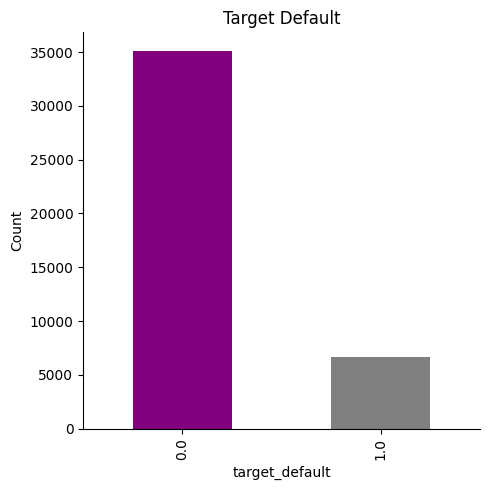

In [120]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Target Default')
ax.set_xlabel('Target Default')
ax.set_ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
df_clean['target_default'].value_counts().plot(kind='bar', ax=ax, color=['purple', 'grey'])

plt.tight_layout()
plt.show()

In [76]:
df_clean.isnull().sum().sum()

0

In [77]:
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,0.0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0
1,0.0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,...,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0
2,1.0,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0
3,0.0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,...,1.0,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0
4,0.0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,...,0.0,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0


In [78]:
#cópia do data frame
df_scaled = df_clean.copy()

In [79]:
# Create a LabelEncoder object
le = LabelEncoder()


In [80]:
df_scaled.columns

Index(['target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'income', 'facebook_profile',
       'state', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income'],
      dtype='object')

In [81]:
df_scaled.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,0.0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0
1,0.0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,...,0.0,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0
2,1.0,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0
3,0.0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,...,1.0,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0
4,0.0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,...,0.0,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0


In [82]:
# Cria uma cópia do DataFrame escalado
encoded_df = df_scaled.copy()

# Identificar as colunas numéricas e categóricas
num_cols = encoded_df.select_dtypes(exclude='object').columns  # Colunas numéricas
cat_cols = encoded_df.select_dtypes(include='object').columns  # Colunas categóricas


# Inicializa o LabelEncoder
LE = LabelEncoder()

# Aplica o LabelEncoder em todas as colunas categóricas
for col in cat_cols:
    encoded_df[col] = LE.fit_transform(encoded_df[col])

# Verificar o resultado
print(encoded_df.head())


   target_default  score_1  score_2  score_3     score_4   score_5  \
0             0.0        0       10    350.0  101.800832  0.259555   
1             0.0        3       16    370.0   97.062615  0.942655   
2             1.0        3        9    360.0  100.027073  0.351918   
3             0.0        0       21    510.0  101.599485  0.987673   
4             0.0        2        1    500.0   98.474289  0.532539   

      score_6  risk_rate  last_amount_borrowed  last_borrowed_in_months  ...  \
0  108.427273       0.40              25033.92                     36.0  ...   
1   92.002546       0.24                  0.00                      0.0  ...   
2  112.892453       0.29               7207.92                     36.0  ...   
3   94.902491       0.32                  0.00                      0.0  ...   
4  118.126207       0.18                  0.00                      0.0  ...   

   n_bankruptcies  n_defaulted_loans  n_accounts  n_issues  \
0             0.0                0.0

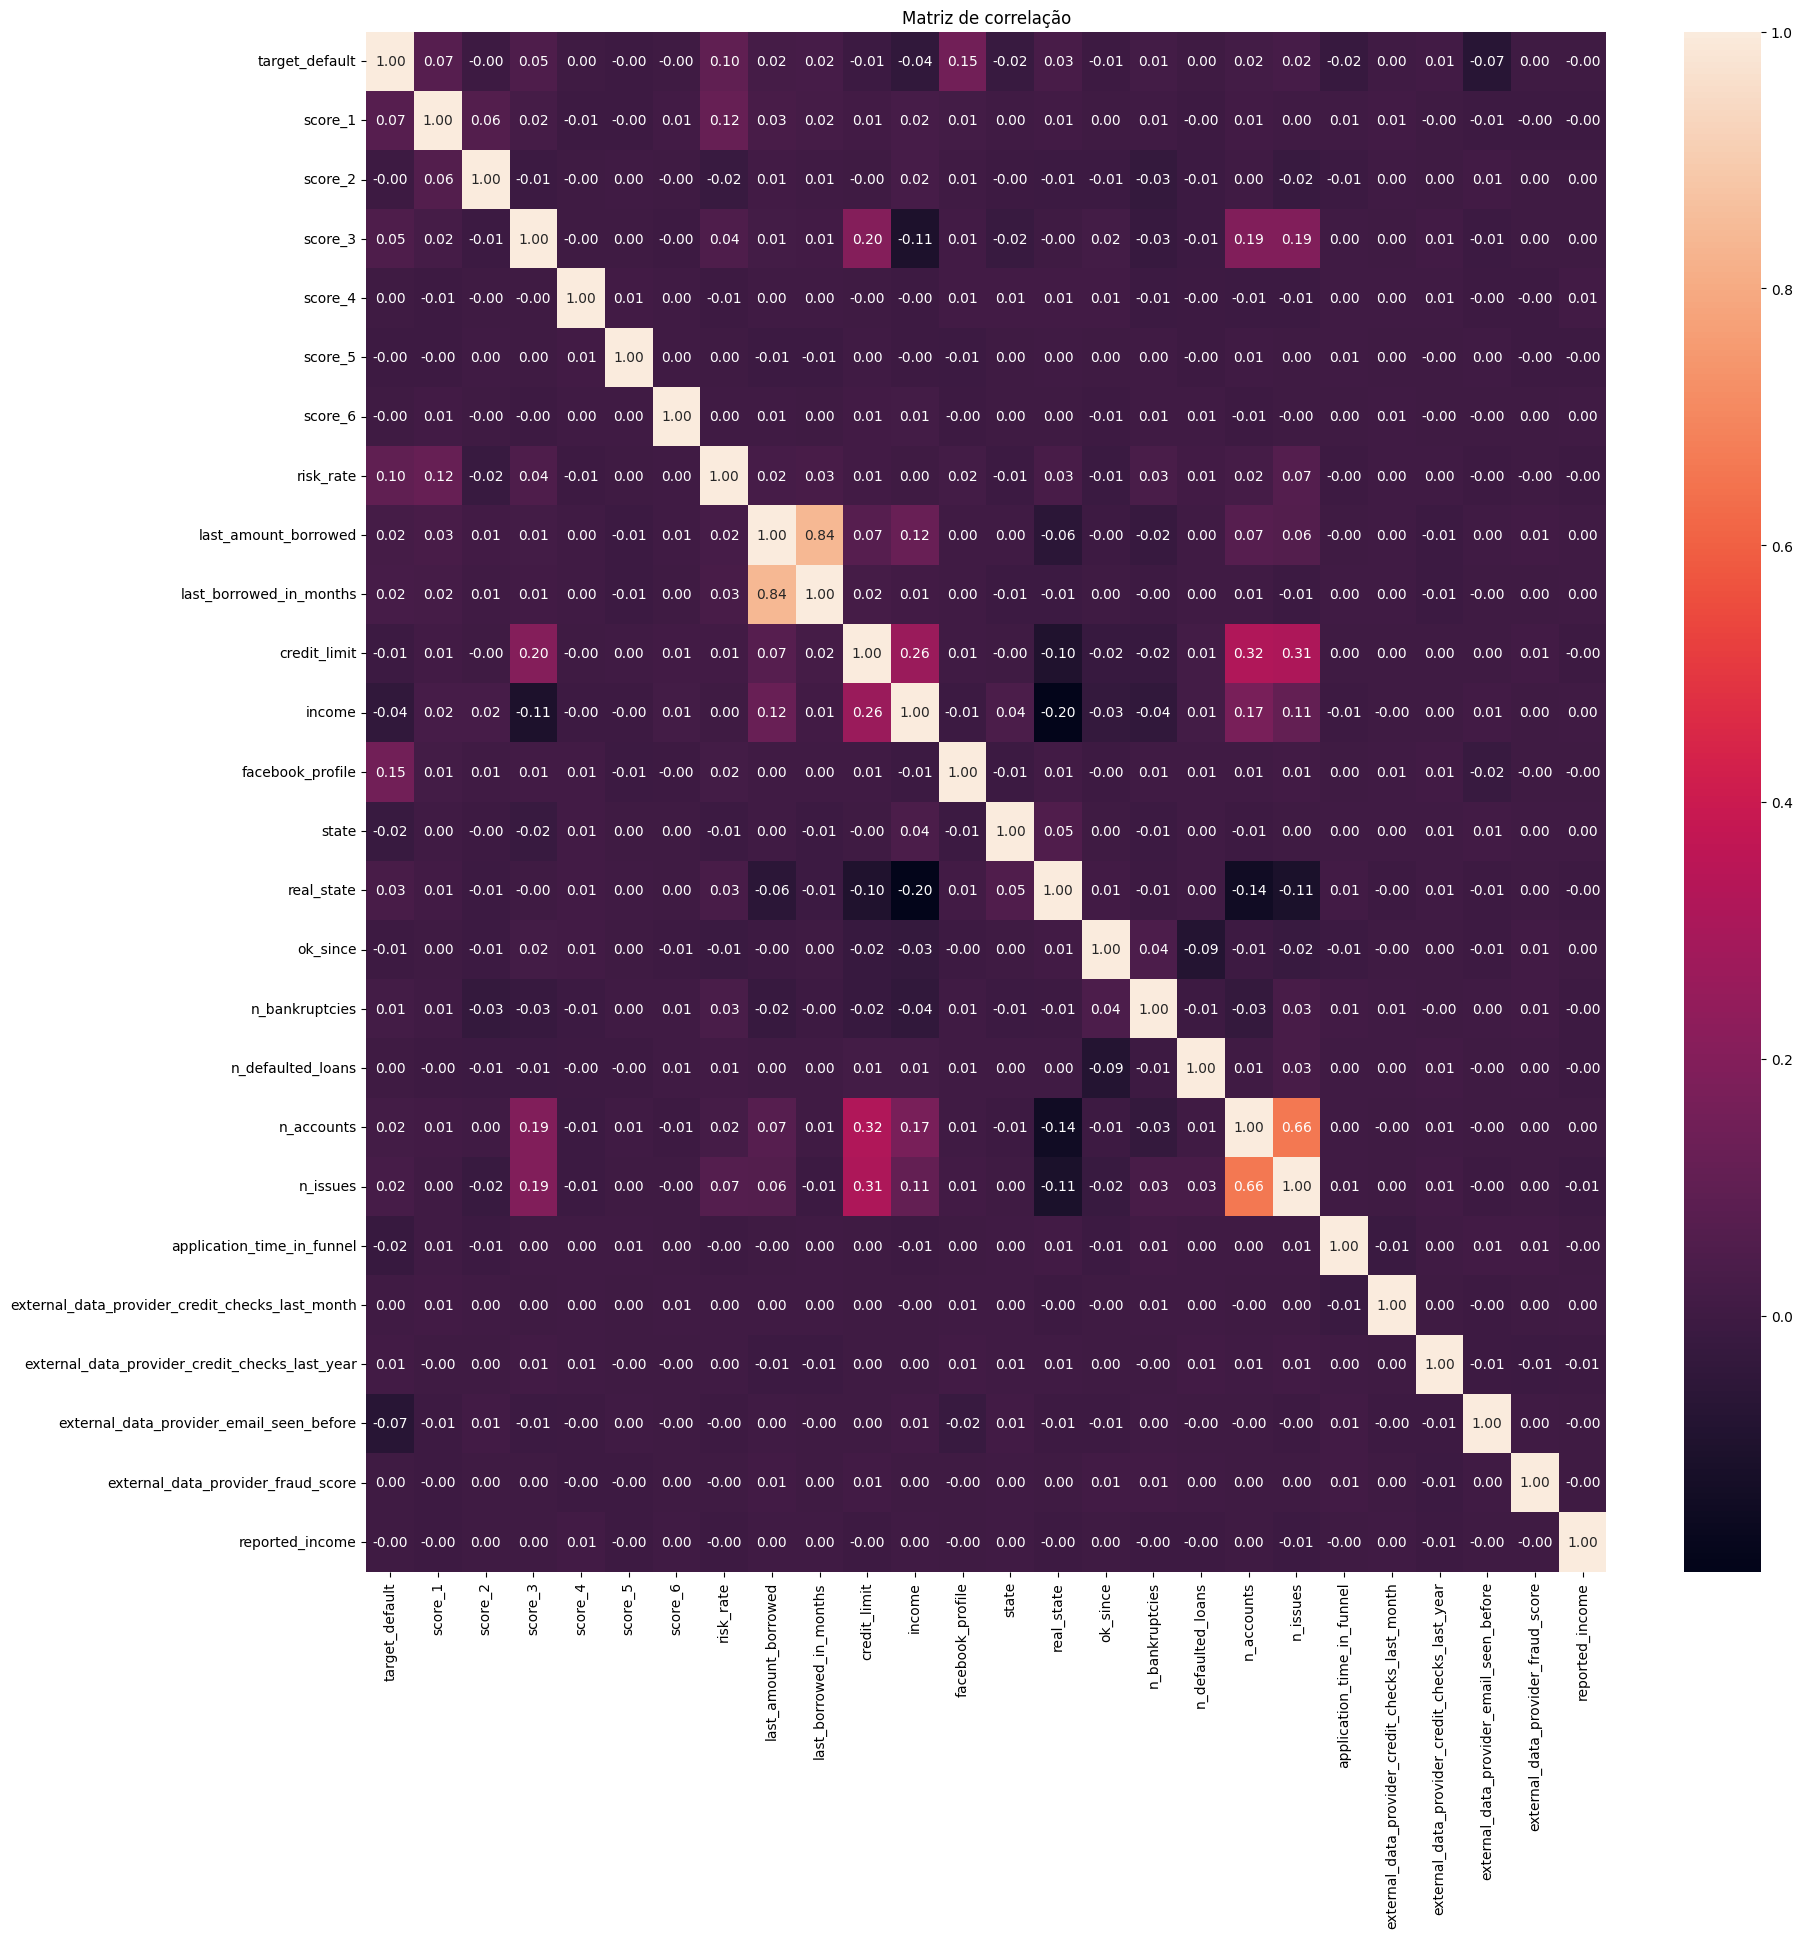

In [83]:
#Correlação de dados
fig, ax = plt.subplots(figsize=(20,20) )
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

In [84]:
encoded_df.columns

Index(['target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'income', 'facebook_profile',
       'state', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income'],
      dtype='object')

In [85]:
#Separando as variáveis
X = encoded_df.drop('target_default', axis=1)
y = encoded_df['target_default']

In [86]:
seed = 42

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [90]:
X_train.head()

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,...,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
35310,2,25,330.0,99.844096,0.811157,84.732579,0.29,5008.63,36.0,25213.0,...,0.0,0.0,10.0,0.0,152.0,3.0,1.0,37.0,695.0,117251.0
26611,3,15,370.0,100.010159,0.441977,99.265886,0.36,0.00,0.0,0.0,...,1.0,0.0,9.0,9.0,441.0,1.0,0.0,27.0,598.0,40028.0
44157,1,30,160.0,101.268474,0.749888,87.319451,0.09,4018.40,36.0,25213.0,...,0.0,0.0,5.0,0.0,60.0,0.0,0.0,47.0,580.0,122494.0
19607,0,21,260.0,102.084393,0.624980,90.069281,0.24,17518.88,36.0,25213.0,...,0.0,0.0,7.0,7.0,329.0,3.0,1.0,50.0,480.0,174884.0
14874,2,25,430.0,98.417162,0.740840,114.028462,0.48,35026.14,60.0,119773.0,...,0.0,0.0,18.0,18.0,377.0,1.0,1.0,39.0,834.0,56294.0


Função para testar os modelos

In [91]:
def mode_val(X,y,model):

  X=X_train
  y=y_train

  pipeline = make_pipeline(StandardScaler(), model)
  pipeline.fit(X,y)
  score = pipeline.score(X,y)
  return score
  return pipeline

In [92]:
LR = LogisticRegression(random_state=seed)
mode_val(X_train,y_train,LR)

0.8381648298993771

In [93]:
lgbm = LGBMClassifier(random_state=seed)
mode_val(X_train,y_train,lgbm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5397, number of negative: 27995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 33392, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161626 -> initscore=-1.646183
[LightGBM] [Info] Start training from score -1.646183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


0.8596669861044561

O modelo que apresentou o melhor desempenho foi o LGBMClassifier, alcançando uma acurácia de 0,85. Apesar desse bom resultado, ainda há espaço para melhorias. O próximo passo será realizar o ajuste fino (tuning) dos hiperparâmetros do modelo, buscando otimizar seu desempenho. Esse processo permitirá explorar configurações que maximizem sua eficácia em diferentes condições.

Como o modelo está sendo aplicado em um cenário de análise de crédito, a métrica mais relevante será aquela relacionada aos falsos positivos. Minimizar falsos positivos é crucial, pois nesse contexto significa reduzir a chance de aprovar crédito para clientes com maior risco de inadimplência. Assim, métricas como precisão e a análise detalhada da matriz de confusão serão fundamentais para avaliar o impacto dessas otimizações.

Com essas etapas, espera-se obter um modelo ainda mais robusto e alinhado aos objetivos do negócio.

In [94]:

# Defina o número de splits para o K-Fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inicialize o modelo LGBMClassifier
model = LGBMClassifier(random_state=42)

# Avaliar o modelo usando acurácia como métrica
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Exibir os resultados
print(f"Acurácia média: {np.mean(scores):.4f}")
print(f"Desvio padrão: {np.std(scores):.4f}")
print(f"Scores individuais: {scores}")

[LightGBM] [Info] Number of positive: 4295, number of negative: 22418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2775
[LightGBM] [Info] Number of data points in the train set: 26713, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160783 -> initscore=-1.652413
[LightGBM] [Info] Start training from score -1.652413


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 4340, number of negative: 22373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2781
[LightGBM] [Info] Number of data points in the train set: 26713, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162468 -> initscore=-1.639981
[LightGBM] [Info] Start training from score -1.639981


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 4299, number of negative: 22415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2784
[LightGBM] [Info] Number of data points in the train set: 26714, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160927 -> initscore=-1.651348
[LightGBM] [Info] Start training from score -1.651348


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 4344, number of negative: 22370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2785
[LightGBM] [Info] Number of data points in the train set: 26714, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162611 -> initscore=-1.638925
[LightGBM] [Info] Start training from score -1.638925


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 4310, number of negative: 22404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2783
[LightGBM] [Info] Number of data points in the train set: 26714, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161339 -> initscore=-1.648302
[LightGBM] [Info] Start training from score -1.648302
Acurácia média: 0.8403
Desvio padrão: 0.0018
Scores individuais: [0.84084444 0.84264111 0.83917341 0.84141959 0.83752621]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [95]:
from sklearn.model_selection import GridSearchCV

# Padronizaçào ou Normalizaçào


O LightGBM não exige normalização ou padronização dos dados de entrada, pois ele utiliza árvores de decisão, que são invariantes a escala dos dados.

# Balanceamento de classes
O balanceamento de classes é importante quando você tem classes desbalanceadas no problema de classificação (ex.: uma classe aparece muito mais frequentemente do que a outra). Para isso sera usado 'is_unbalance': True dentro da modelagem.



In [96]:
# Definir o modelo
model = LGBMClassifier(random_state=42,is_unbalance=True)

# Definir o grid de hiperparâmetros para busca
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [ 0.05, 0.1],
    'n_estimators': [50, 200],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# Ajustar o GridSearchCV
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5397, number of negative: 27995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2790
[LightGBM] [Info] Number of data points in the train set: 33392, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161626 -> initscore=-1.646183
[LightGBM] [Info] Start training from score -1.646183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=5, estimator=LGBMClassifier(is_unbalance=True, random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1],
                         'n_estimators': [50, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='f1')

In [99]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      7085
         1.0       0.26      0.57      0.36      1264

    accuracy                           0.69      8349
   macro avg       0.58      0.64      0.57      8349
weighted avg       0.81      0.69      0.73      8349




O parâmetro scale_pos_weight permite ajustar manualmente o peso da classe minoritária
scale_pos_weight = 7085 / 1264 ≈ 5.6


In [111]:
model = LGBMClassifier(random_state=42, scale_pos_weight=5.6)
# Definir o grid de hiperparâmetros para busca
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [ 0.05, 0.1],
    'n_estimators': [50, 200],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# Ajustar o GridSearchCV
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5397, number of negative: 27995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2790
[LightGBM] [Info] Number of data points in the train set: 33392, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161626 -> initscore=-1.646183
[LightGBM] [Info] Start training from score -1.646183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LGBMClassifier(random_state=42, scale_pos_weight=5.6),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1],
                         'n_estimators': [50, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='f1')

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [117]:
# Ajustar o GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 27995, number of negative: 27995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4985
[LightGBM] [Info] Number of data points in the train set: 55990, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LGBMClassifier(random_state=42, scale_pos_weight=5.6),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1],
                         'n_estimators': [50, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='f1')

In [118]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      7085
         1.0       0.27      0.40      0.32      1264

    accuracy                           0.74      8349
   macro avg       0.58      0.60      0.58      8349
weighted avg       0.79      0.74      0.76      8349



In [98]:

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

Melhores hiperparâmetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 31}


In [100]:


# Exibir a melhor pontuação (acurácia)
print(f"Melhor Acurácia: {grid_search.best_score_:.4f}")

Melhor Acurácia: 0.3867


# Conclusão



Conclusão
Durante o experimento, foram avaliadas diferentes abordagens para lidar com o desbalanceamento da variável-alvo, com o objetivo de melhorar a capacidade do modelo em identificar corretamente os exemplos da classe minoritária. As técnicas testadas incluem:

Ajuste automático de balanceamento (is_unbalance=True):
Essa abordagem demonstrou o melhor desempenho geral, conseguindo equilibrar a identificação das duas classes, com um impacto positivo no recall da classe minoritária (classe 1). Esse resultado indica que o ajuste interno de pesos realizado pelo LightGBM conseguiu lidar de forma eficiente com o desbalanceamento sem necessidade de intervenções externas.
Ajuste manual de pesos (scale_pos_weight=5.6):
Embora esse método tenha como objetivo personalizar a penalização das classes, o desempenho foi inferior ao da configuração com is_unbalance=True. Isso pode ter ocorrido devido a um desvio no ajuste do peso, que acabou resultando em uma maior priorização da classe minoritária em detrimento da precisão geral. Esse comportamento ressalta que ajustes manuais exigem mais experimentação e calibração para alcançar um equilíbrio ideal entre precision e recall.
Reamostragem com SMOTE:
A aplicação do SMOTE (Synthetic Minority Oversampling Technique) proporcionou um desempenho razoável, mas ainda ficou abaixo do modelo configurado com is_unbalance=True. Apesar de gerar novos exemplos sintéticos para equilibrar as classes no conjunto de treinamento, o modelo parece ter sofrido com a introdução de possíveis ruídos nos dados. Isso pode ser um indicativo de que a complexidade da distribuição da classe minoritária não foi bem capturada pela técnica.
